<a href="https://colab.research.google.com/github/Swathyyyyy/myrepo/blob/main/Hand__Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction-Classification Analysis**

**The didgits dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents**

## **Import Library**

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## **Import Data**

In [5]:
from sklearn.datasets import load_digits

In [6]:
df = load_digits()

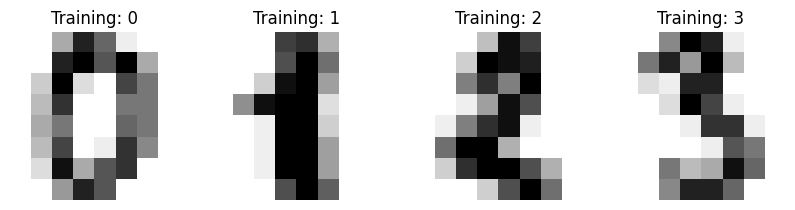

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

##**Data Preprocessing**

###**Flatten image**

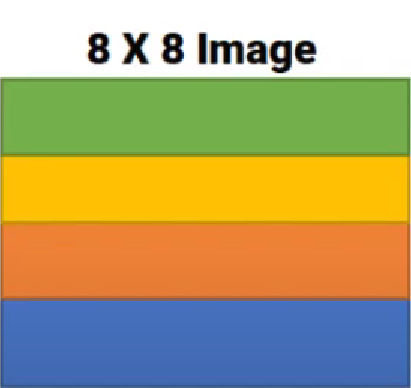





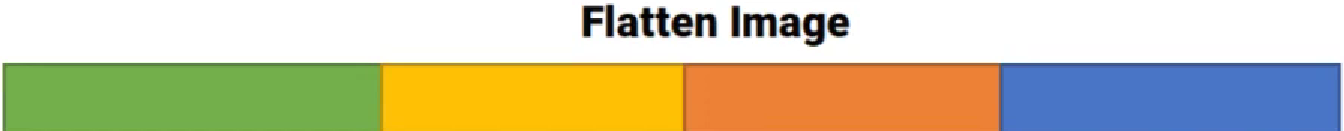

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

In [16]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
data[0].shape

(64,)

In [19]:
data.shape

(1797, 64)

##**Scaling Image Data**

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##**Train Test Split Data**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data,df.target,test_size=0.3)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

##**Random Forest Model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

##**Predict Test Data**

In [33]:
y_pred = rf.predict(X_test)

In [34]:
y_pred

array([4, 5, 0, 2, 7, 8, 9, 4, 5, 1, 6, 6, 0, 0, 9, 7, 3, 2, 9, 6, 1, 5,
       1, 0, 0, 7, 1, 5, 1, 0, 6, 5, 2, 2, 8, 0, 7, 5, 6, 4, 9, 5, 0, 0,
       7, 3, 5, 8, 5, 2, 0, 2, 4, 0, 4, 2, 4, 3, 2, 4, 4, 3, 7, 1, 0, 6,
       8, 6, 6, 0, 7, 9, 1, 5, 3, 9, 4, 0, 4, 6, 4, 9, 9, 6, 4, 8, 6, 7,
       6, 7, 1, 9, 5, 7, 8, 3, 3, 5, 6, 3, 6, 8, 7, 9, 3, 3, 1, 5, 7, 1,
       0, 6, 6, 6, 8, 8, 1, 1, 9, 3, 4, 1, 3, 9, 7, 3, 3, 9, 4, 7, 2, 6,
       3, 5, 2, 0, 7, 7, 1, 6, 9, 2, 9, 8, 4, 4, 5, 2, 2, 1, 3, 7, 2, 8,
       9, 1, 5, 3, 2, 1, 2, 5, 3, 6, 8, 9, 5, 3, 0, 7, 5, 2, 8, 1, 0, 1,
       2, 4, 6, 1, 2, 2, 5, 5, 6, 4, 6, 4, 6, 7, 6, 1, 4, 0, 0, 6, 7, 9,
       6, 1, 3, 2, 5, 1, 4, 8, 6, 1, 1, 1, 4, 7, 3, 3, 7, 7, 1, 4, 9, 2,
       3, 6, 2, 8, 9, 0, 1, 3, 4, 8, 8, 0, 9, 2, 2, 9, 2, 7, 0, 0, 7, 9,
       3, 4, 1, 8, 8, 9, 7, 5, 8, 6, 0, 3, 1, 2, 9, 3, 6, 3, 2, 5, 8, 9,
       6, 8, 5, 9, 6, 4, 8, 9, 9, 7, 2, 8, 4, 0, 6, 5, 0, 9, 3, 8, 4, 9,
       4, 1, 3, 1, 6, 4, 6, 5, 4, 0, 3, 3, 8, 8, 3,

##**Model Accuracy**

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 56,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 53,  0,  1],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 51]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        49
           2       0.98      1.00      0.99        58
           3       0.95      0.93      0.94        60
           4       0.95      0.96      0.95        55
           5       0.98      0.98      0.98        49
           6       1.00      0.98      0.99        54
           7       0.91      0.96      0.94        55
           8       0.98      0.94      0.96        52
           9       0.98      0.94      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



##**Explanation**

Machine learning and deep learning plays an important role in computer technology and artificial intelligence. With the use of deep learning and machine learning, human effort can be reduced in recognizing, learning, predictions and many more areas. This article presents recognizing the handwritten digits (0 to 9) from the famous MNIST dataset, comparing classifiers like KNN, PSVM, NN and convolution neural network on basis of performance, accuracy, time, sensitivity, positive productivity, and specificity with using different parameters with the classifiers.

Digit Prediction system is the working of a machine to train itself or recognizing the digits from different sources like emails, bank cheque, papers, images, etc. and in different real-world scenarios for online handwriting recognition on computer tablets or system, recognize number plates of vehicles, processing bank cheque amounts, numeric entries in forms filled up by hand (say — tax forms) and so on.

